# Parte II - MLP com Keras (Regressão - Insurance Dataset)

# 1. Imports e Carregamento de Dados

In [1]:
# 1. Imports e Carregamento de Dados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregar dados
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [2]:
# 3. Separar treino, validação e teste

X = df.drop('charges', axis=1)
y = df['charges']


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 15% de validação final

# 4. Preprocessamento com ColumnTransformer
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Aplicar transformação
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

In [6]:
# 5. Definir modelo (exemplo base)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=[
                'accuracy',
                keras.metrics.F1Score(average = 'weighted')
            ])

C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 6. Treinar modelo com EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - f1_score: 1.9999 - loss: 333668896.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 1.9998 - val_loss: 282248480.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.9999 - loss: 327426560.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 1.9998 - val_loss: 282151776.0000
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.9999 - loss: 344958368.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 1.9998 - val_loss: 281935680.0000
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.9999 - loss: 353461408.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 1.9998 - val_loss: 281508736.0000
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - f1_score: 1.9998 - loss: 320418496.0000 - val_accuracy: 0.0000e+00 - val_f1_score: 1.9998 - val_loss: 280756256.0000
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━

In [9]:
# 7. Avaliação e métricas
predictions = model.predict(X_test_processed)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
MSE: 31282543.56
MAE: 3982.63
R2: 0.79


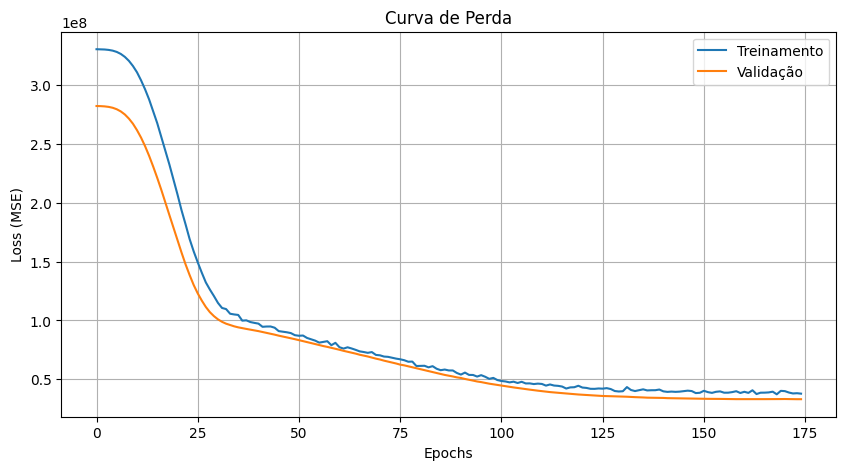

In [11]:
# 8. Gráfico de perda
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Treinamento')
plt.plot(history['val_loss'], label='Validação')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Curva de Perda')
plt.grid(True)
plt.show()

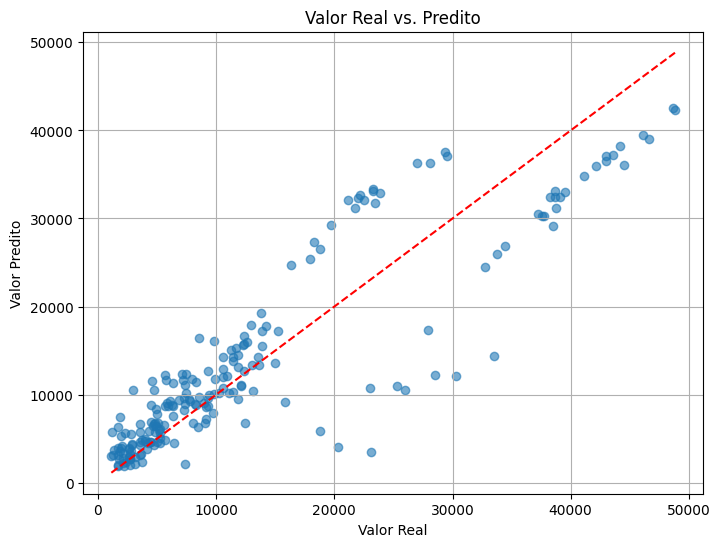

In [12]:
# 9. Gráfico de Valor Real vs. Predito
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valor Real vs. Predito')
plt.grid(True)
plt.show()

In [13]:
# 5. Função para treinar modelos com diferentes hiperparâmetros
def treinar_modelo(neuronios, ativacao, learning_rate, batch_size):
    model = Sequential([
        Dense(neuronios, activation=ativacao, input_shape=(X_train_processed.shape[1],)),
        Dropout(0.3),
        Dense(int(neuronios / 2), activation=ativacao),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse')
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train_processed, y_train,
        validation_data=(X_val_processed, y_val),
        epochs=200,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )
    y_pred = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [14]:
# 6. Testes de hiperparâmetros
hiperparametros = [
    {'neuronios': 64, 'ativacao': 'relu', 'learning_rate': 0.001, 'batch_size': 32},
    {'neuronios': 128, 'ativacao': 'relu', 'learning_rate': 0.001, 'batch_size': 32},
    {'neuronios': 64, 'ativacao': 'tanh', 'learning_rate': 0.001, 'batch_size': 32},
    {'neuronios': 64, 'ativacao': 'relu', 'learning_rate': 0.0005, 'batch_size': 32},
    {'neuronios': 64, 'ativacao': 'relu', 'learning_rate': 0.001, 'batch_size': 16},
]

resultados = []
for config in hiperparametros:
    mse, mae, r2 = treinar_modelo(**config)
    resultados.append({
        'config': config,
        'mse': mse,
        'mae': mae,
        'r2': r2
    })

C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
# 7. Exibir resultados
for r in resultados:
    print("Config:", r['config'])
    print(f"MSE: {r['mse']:.2f} | MAE: {r['mae']:.2f} | R2: {r['r2']:.2f}")
    print("-" * 50)